In [1]:
import json
import logging
import os
from pathlib import Path
from hdmf_zarr import NWBZarrIO
from importlib import reload

import warnings
from aind_dynamic_foraging_data_utils import code_ocean_utils as co_utils
from aind_dynamic_foraging_data_utils import nwb_utils, alignment, enrich_dfs


In [3]:
cd .. 

/root/capsule/code


/opt/conda/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [4]:
import sys

from analysis_wrapper import analysis_util
from analysis_pipeline_utils.analysis_dispatch_model import AnalysisDispatchModel
from analysis_wrapper.analysis_model import (
    SummaryPlotsAnalysisSpecification, SummaryPlotsAnalysisSpecificationCLI
)
import analysis_wrapper.utils as utils
import subprocess
import analysis_wrapper.run_capsule as capsule_funcs


In [6]:
DATA_PATH = Path("/data")  # TODO: don't hardcode
model_path = tuple(DATA_PATH.glob('job_dict/*'))[0]
analysis_specs = None

analysis_spec_path = tuple(DATA_PATH.glob("analysis_parameters.json"))
if analysis_spec_path:
    with open(analysis_spec_path[0], "r") as f:
        analysis_specs = json.load(f)
analysis_specification = SummaryPlotsAnalysisSpecification.model_validate(analysis_specs).model_dump()

with open(model_path, "r") as f:
    analysis_dispatch_inputs = AnalysisDispatchModel.model_validate(json.load(f))


In [7]:
from aind_analysis_arch_result_access.han_pipeline import get_session_table
df = get_session_table(if_load_bpod=False)

analysis_dispatch_inputs.file_location
subject_id = analysis_dispatch_inputs.file_location[0].split('behavior_')[1].split('_')[0]
df_trained = df[(df['subject_id'] == subject_id) & (df['current_stage_actual'].isin(['GRADUATED']))]
session_names = [
    f"{row['subject_id']}_{row['session_date'].strftime('%Y-%m-%d')}"
    for _, row in df_trained.iterrows()
]

filtered_file_locations = [
    f for f in analysis_dispatch_inputs.file_location
    if any(session_name in f for session_name in session_names)
]

2025-09-11 01:27:28,859 - INFO - Loading session table from s3://aind-behavior-data/foraging_nwb_bonsai_processed ...
2025-09-11 01:27:29,910 - INFO - Loading mouse PI mapping from s3://aind-behavior-data/foraging_nwb_bonsai_processed ...
2025-09-11 01:27:29,968 - INFO - Post-hoc processing...
2025-09-11 01:27:32,072 - INFO - Loaded curriculum data from Han's autotrain.
2025-09-11 01:27:32,073 - INFO - Loading curriculum data from docDB...
2025-09-11 01:27:43,180 - INFO - Loaded 9 curriculum data from docDB.


In [10]:
reload(co_utils)
reload(capsule_funcs)

<module 'analysis_wrapper.run_capsule' from '/root/capsule/code/analysis_wrapper/run_capsule.py'>

In [11]:

(df_sess, df_trials_final, df_events, df_fip_final) = capsule_funcs.get_nwb_processed(filtered_file_locations, **analysis_specification)



Saving channels: ['G_0_dff-bright']
CURRENTLY RUNNING 1/6: 781896_2025-04-15
--------------------------------------------------
Timestamps are adjusted such that `_in_session` timestamps start at the first go cue
Timestamps are adjusted such that `_in_session` timestamps start at the first go cue
Timestamps are adjusted such that `_in_session` timestamps start at the first go cue
CURRENTLY RUNNING 2/6: 781896_2025-04-14
--------------------------------------------------
Timestamps are adjusted such that `_in_session` timestamps start at the first go cue
Skipping 781896_2025-04-14 due to error in df_fip: 'FIP_falling_time'
CURRENTLY RUNNING 3/6: 781896_2025-04-21
--------------------------------------------------
Timestamps are adjusted such that `_in_session` timestamps start at the first go cue
Timestamps are adjusted such that `_in_session` timestamps start at the first go cue
Timestamps are adjusted such that `_in_session` timestamps start at the first go cue
CURRENTLY RUNNING 4/6: 

Get latent variables from s3: 100%|██████████| 1/1 [00:00<00:00,  7.13it/s]


Query: {'analysis_spec.analysis_name': 'MLE fitting', 'analysis_spec.analysis_ver': 'first version @ 0.10.0', 'subject_id': '781896', 'session_date': '2025-04-14', 'analysis_results.fit_settings.agent_alias': 'QLearning_L2F1_CKfull_softmax'}
Found 1 MLE fitting records!
Found 1 successful MLE fitting!


Get latent variables from s3: 100%|██████████| 1/1 [00:00<00:00,  8.19it/s]


Query: {'analysis_spec.analysis_name': 'MLE fitting', 'analysis_spec.analysis_ver': 'first version @ 0.10.0', 'subject_id': '781896', 'session_date': '2025-04-21', 'analysis_results.fit_settings.agent_alias': 'QLearning_L2F1_CKfull_softmax'}
Found 1 MLE fitting records!
Found 1 successful MLE fitting!


Get latent variables from s3: 100%|██████████| 1/1 [00:00<00:00,  8.48it/s]


Query: {'analysis_spec.analysis_name': 'MLE fitting', 'analysis_spec.analysis_ver': 'first version @ 0.10.0', 'subject_id': '781896', 'session_date': '2025-04-22', 'analysis_results.fit_settings.agent_alias': 'QLearning_L2F1_CKfull_softmax'}
Found 1 MLE fitting records!
Found 1 successful MLE fitting!


Get latent variables from s3: 100%|██████████| 1/1 [00:00<00:00,  6.97it/s]

Query: {'analysis_spec.analysis_name': 'MLE fitting', 'analysis_spec.analysis_ver': 'first version @ 0.10.0', 'subject_id': '781896', 'session_date': '2025-05-01', 'analysis_results.fit_settings.agent_alias': 'QLearning_L2F1_CKfull_softmax'}


Found 1 MLE fitting records!
Found 1 successful MLE fitting!


Get latent variables from s3: 100%|██████████| 1/1 [00:00<00:00,  9.01it/s]


Query: {'analysis_spec.analysis_name': 'MLE fitting', 'analysis_spec.analysis_ver': 'first version @ 0.10.0', 'subject_id': '781896', 'session_date': '2025-05-02', 'analysis_results.fit_settings.agent_alias': 'QLearning_L2F1_CKfull_softmax'}
Found 1 MLE fitting records!
Found 1 successful MLE fitting!


Get latent variables from s3: 100%|██████████| 1/1 [00:00<00:00,  7.22it/s]
/src/aind-dynamic-foraging-data-utils/src/aind_dynamic_foraging_data_utils/enrich_dfs.py:378: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ses.loc[:, "Q_chosen"] = chosen_values
/src/aind-dynamic-foraging-data-utils/src/aind_dynamic_foraging_data_utils/enrich_dfs.py:379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ses.loc[:, "Q_unchosen"] = unchosen_values
/src/aind-dynamic-foraging-data-utils/src/aind_dynamic_foraging_data

In [ ]:
df_trials_final_saved = df_trials_final.copy()

# get additional columns to prep for plotting

In [30]:
df_trials_final['reward_all'] = df_trials_final['earned_reward'] + df_trials_final['extra_reward']
# Compute num_reward_past and num_no_reward_past
df_trials_final['reward_shifted'] = df_trials_final.groupby('ses_idx')['reward_all'].shift(1)  # Shift to look at past values

df_trials_final['num_reward_past'] = df_trials_final.groupby(
                        (df_trials_final['reward_shifted'] != df_trials_final['reward_all']).cumsum()).cumcount() + 1

# Set 'NA' for mismatched reward types
df_trials_final.loc[df_trials_final['reward_all'] == 0, 'num_reward_past'] = df_trials_final.loc[df_trials_final['reward_all'] == 0, 'num_reward_past']* -1 

# Drop the temporary column
df_trials_final.drop(columns=['reward_shifted'], inplace=True)


RPE_binned3_label_names = [str(np.round(i,2)) for i in np.arange(-1,1.1,1/3)]

df_trials_final['RPE-binned3'] = pd.cut(df_trials_final['RPE_all'],# all versus earned not a huge difference
                    np.arange(-1,1.01,1/3), labels=[str(np.round(i,2)) for i in np.arange(-1,1,1/3)])

In [31]:

(df_sess, nwbs_by_week) = analysis_util.get_dummy_nwbs_by_week(df_sess, df_trials_final, df_events, df_fip_final) 
nwbs_all = [nwb for nwb_week in nwbs_by_week for nwb in nwb_week]

/root/capsule/code/analysis_wrapper/analysis_util.py:64: UserWarning: Skipping 781896_2025-04-14: not found in all input DataFrames.
  warnings.warn(f"Skipping {ses_idx}: not found in all input DataFrames.", UserWarning)


In [43]:
nwbs_by_week[1]

[781896_2025-04-21, 781896_2025-04-22]

# plotting code

In [13]:
from aind_dynamic_foraging_basic_analysis.plot import plot_fip as pf

reload(pf)

<module 'aind_dynamic_foraging_basic_analysis.plot.plot_fip' from '/src/aind-dynamic-foraging-basic-analysis/src/aind_dynamic_foraging_basic_analysis/plot/plot_fip.py'>

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': '2 sessions'}, xlabel='Time (s)', ylabel='z-scored df/f'>)

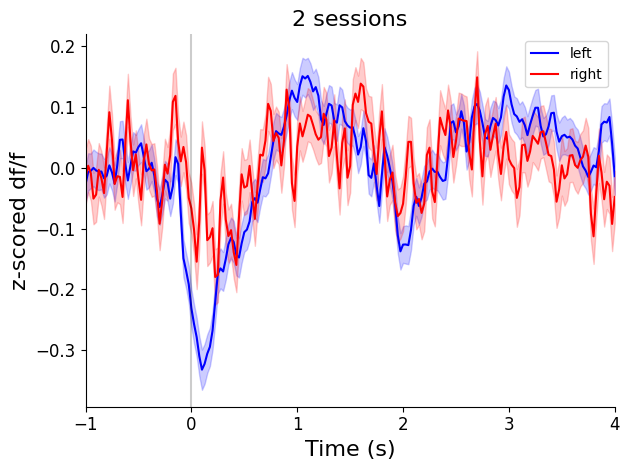

In [ ]:

trial_width_choice = [-1, 4]

pf.plot_fip_psth_compare_alignments(nwbs_by_week[0], [{"left":nwb.df_trials.query("choice == 0").choice_time_in_session.values,
                                                "right":nwb.df_trials.query("choice == 1").choice_time_in_session.values} for nwb in nwbs_by_week[0]], 
                                                channel, tw=trial_width_choice, extra_colors= {"left":'b',"right":'r'},
                                                data_column = "data_z", error_type = "sem")

# pf.plot_fip_psth_compare_alignments(nwbs_by_week[-1][0], {f"left":nwbs_by_week[-1][0].df_trials.query('choice == 0').choice_time_in_session.values,
#                                                 f"right":nwbs_by_week[-1][0].df_trials.query('choice == 1').choice_time_in_session.values}, 
#                                                 'G_0_dff-bright', extra_colors= {"left choice at choice":'b',"right choice at choice":'r'},
#                                                 tw=trial_width_choice)

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': '2 sessions'}, xlabel='Time (s)', ylabel='df/f'>)

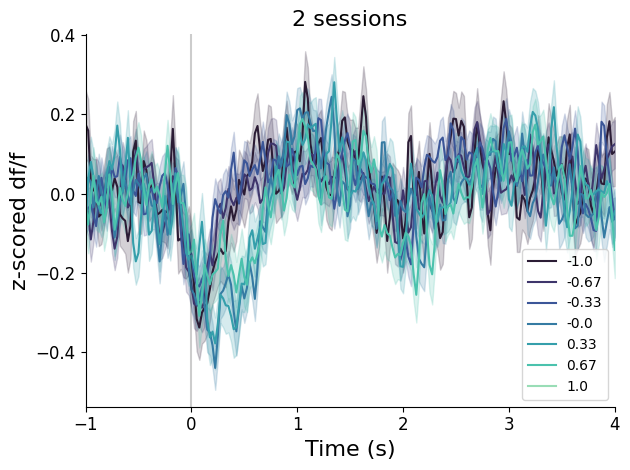

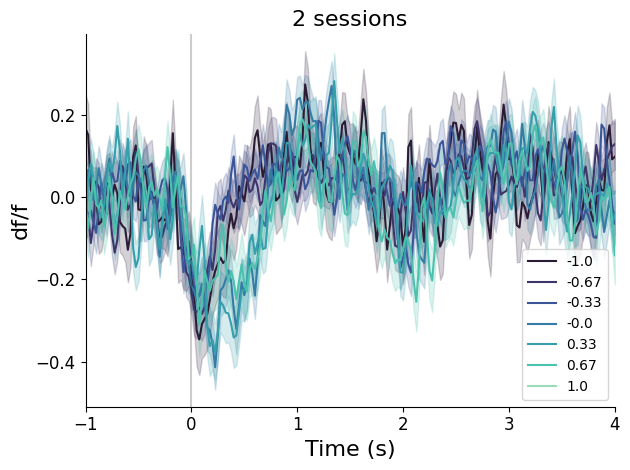

In [85]:
get_RPE_binned3_dfs = lambda df_trials:[df_trials[df_trials['RPE-binned3'] == RPE]['choice_time_in_session'].values for RPE in RPE_binned3_label_names]
RPE_binned3_dfs_dicts =[dict(zip(RPE_binned3_label_names, get_RPE_binned3_dfs(nwb.df_trials))) for nwb in nwbs_by_week[0]]

pf.plot_fip_psth_compare_alignments(nwbs_by_week[0], RPE_binned3_dfs_dicts,
                                                    channel,  extra_colors=dict(zip(RPE_binned3_label_names,
                                                    sns.color_palette("mako", len(RPE_binned3_label_names)).as_hex())),
                                                    tw=trial_width_choice,censor= True, data_column = "data_z", error_type = "sem")


pf.plot_fip_psth_compare_alignments(nwbs_by_week[0], RPE_binned3_dfs_dicts,
                                                    channel,  extra_colors=dict(zip(RPE_binned3_label_names,
                                                    sns.color_palette("mako", len(RPE_binned3_label_names)).as_hex())),
                                                    tw=trial_width_choice,censor= True, data_column = "data_z_norm", error_type = "sem")

In [14]:
df_trials_by_week = pd.concat([nwb.df_trials for nwb in nwbs_by_week[0]])
df_trials_by_week = df_trials_by_week.query(
            'num_reward_past > -7 and num_reward_past < 7'
        ).sort_values('trial')


if len(nwbs_by_week[0]) > 1:
    # Step 1: Compute mean per session per bin
    grouped = (
        df_trials_by_week
        .groupby(['ses_idx', 'num_reward_past'])[f'data_z_{channel}_baseline']
        .mean()
        .reset_index()
    )

    # Step 2: Compute grand mean and SE across sessions for each bin
    agg = (
        grouped
        .groupby('num_reward_past')[f'data_z_{channel}_baseline']
        .agg(['mean', 'sem'])
        .reset_index()
    )

    # plot
    plt.bar(
        agg['num_reward_past'],
        agg['mean'],
        yerr=agg['sem'],
        color=sns.color_palette('vlag', len(agg)),
    )
    plt.xlabel('num_reward_past')
    plt.ylabel(f'data_z_{channel}_baseline')
    plt.legend()
else:
    sns.barplot(
            x='num_reward_past',
            y=f'data_z_{channel}_baseline',
            data=df_trials_by_week,
            palette='vlag',
            hue='num_reward_past',
            errorbar='se',
            dodge=False,
            legend = False
        )

UndefinedVariableError: name 'num_reward_past' is not defined

In [86]:
nwbs_by_week[0][0].df_trials

,trial,choice,rewarded_historyL,rewarded_historyR,side_bias,side_bias_confidence_interval,bait_left,bait_right,base_reward_probability_sum,reward_probabilityL,...,RPE_earned,RPE_all,goCue_start_time_next_in_session,goCue_start_time_next_in_trial,data_G_0_dff-bright_baseline,data_z_G_0_dff-bright_baseline,reward_all,num_reward_past,RPE-binned3,week_interval
1058,0,0.0,False,False,0.000000,"[0.0, 0.0]",False,False,0.8,0.1,...,0.000000,0.000000,6.349056,6.349056,-0.002264,-0.160179,False,-1,-0.0,1
1059,1,0.0,False,False,0.000000,"[0.0, 0.0]",False,False,0.8,0.1,...,0.000000,0.000000,16.548768,10.199712,-0.000122,-0.010452,False,-2,-0.0,1
1060,2,0.0,False,False,0.000000,"[0.0, 0.0]",False,False,0.8,0.1,...,0.000000,0.000000,24.915840,8.367072,-0.001897,-0.134578,False,-3,-0.0,1
1061,3,0.0,False,False,0.000000,"[0.0, 0.0]",False,True,0.8,0.1,...,0.000000,0.000000,30.448896,5.533056,-0.007866,-0.551779,False,-4,-0.0,1
1062,4,0.0,False,False,0.000000,"[0.0, 0.0]",False,True,0.8,0.1,...,0.000000,0.000000,38.698944,8.250048,-0.000612,-0.044769,False,-5,-0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,497,1.0,False,True,-0.147821,"[-0.37427849760718374, 0.08807618599340136]",False,True,0.8,0.1,...,0.773165,0.773165,4462.260992,7.517120,0.004344,0.301693,True,1,0.67,1
1556,498,1.0,False,True,-0.138317,"[-0.39265497046488373, 0.1011192622009267]",True,True,0.8,0.1,...,0.580964,0.580964,4483.027904,20.766912,-0.002808,-0.198241,True,2,0.33,1
1557,499,0.0,True,False,-0.138317,"[-0.39265497046488373, 0.1011192622009267]",True,False,0.8,0.1,...,0.789504,0.789504,4488.560992,5.533088,0.001507,0.103405,True,3,0.67,1
1558,500,0.0,False,False,-0.138317,"[-0.39265497046488373, 0.1011192622009267]",False,False,0.8,0.1,...,-0.406759,-0.406759,4494.511072,5.950080,0.001342,0.091873,False,-1,-0.67,1


In [ ]:
channel = analysis_specification["channel"]
df_trials_averaged_signal = get_average_signal_window_multi(
                        nwbs_by_week[1],
                        alignment_event='choice_time_in_session',
                        offsets=[0.33, 1],
                        channel=channel,
                        data_col='data_z_norm'
                    )

# ADD THIS as a final week by week analysis. Add a line fit for positive RPE, negative RPE, and for ALL of the data at once
# use data_z_norm


# write a variation of the baseline code, but using a scatter plot instead; fit a line also. ask which one is preferred on chat


NameError: name 'analysis_specification' is not defined

# big plotting function

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from aind_dynamic_foraging_basic_analysis.plot import plot_fip as pf
import numpy as np
import pandas as pd
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec

def plot_weekly_grid(df_sess,nwbs_by_week, channel, loc=None):

    week_intervals = sorted(df_sess['week_interval'].unique())
    nrows = 1 + len(week_intervals)
    ncols = 4
    trial_width_choice = [-1, 4]
    RPE_binned3_label_names = [str(np.round(i,2)) for i in np.arange(-1,1.1,1/3)]

    fig = plt.figure(figsize=(ncols*5, nrows*4))
    plt.suptitle(f"{df_sess['subject_id'].unique()[0]} ({channel})", fontsize = 16)

    outer = GridSpec(nrows, 1, figure=fig)

    # axes_rows will hold lists of 4 axes for each row; index 0 reserved for the top summary row (unused)
    axes_rows = [None] * nrows

    # --- Rows 1+: Per week interval ---
    for week_i, nwbs in enumerate(nwbs_by_week):
        row = week_i + 1

        # create a small title row above the 4 panels using a nested GridSpec
        inner = GridSpecFromSubplotSpec(2, 4, subplot_spec=outer[row], height_ratios=[0.12, 0.88], hspace=0.0, wspace=0.3)
        title_ax = fig.add_subplot(inner[0, :])
        title_ax.axis('off')
        title_ax.set_title(f"Week {week_i} ({len(nwbs)} sessions)", fontsize=16, fontweight='bold')

        # create the 4 panel axes for this row
        panels = [fig.add_subplot(inner[1, col]) for col in range(4)]
        axes_rows[row] = panels

        # 1. Choice L vs R
        pf.plot_fip_psth_compare_alignments(
                nwbs,
                [{"left": nwb.df_trials.query("choice == 0").choice_time_in_session.values,
                  "right": nwb.df_trials.query("choice == 1").choice_time_in_session.values} for nwb in nwbs],
                channel,
                tw=trial_width_choice,
                extra_colors={"left": 'b', "right": 'r'},
                data_column="data_z",
                error_type="sem",
                ax=panels[0],
            )

        # 2 RPE_binned3
        get_RPE_binned3_dfs = lambda df_trials: [
            df_trials[df_trials['RPE-binned3'] == RPE]['choice_time_in_session'].values for RPE in RPE_binned3_label_names
        ]
        RPE_binned3_dfs_dicts = [
            dict(zip(RPE_binned3_label_names, get_RPE_binned3_dfs(nwb.df_trials))) for nwb in nwbs
        ]
        pf.plot_fip_psth_compare_alignments(
                nwbs, RPE_binned3_dfs_dicts, channel,
                extra_colors=dict(zip(RPE_binned3_label_names, sns.color_palette("mako", len(RPE_binned3_label_names)).as_hex())),
                tw=trial_width_choice, censor=True, data_column="data_z", error_type="sem", ax=panels[1]
            )

        # 3. Baseline by num_reward_past (grand mean/SE)
        df_trials_by_week = pd.concat([nwb.df_trials for nwb in nwbs])
        df_trials_by_week = df_trials_by_week.query(
            'num_reward_past > -7 and num_reward_past < 7'
        ).sort_values('trial')
        if len(nwbs) > 1:
            grouped = (
                    df_trials_by_week
                    .groupby(['ses_idx', 'num_reward_past'])[f'data_z_{channel}_baseline']
                    .mean()
                    .reset_index()
                )
            agg = (
                    grouped
                    .groupby('num_reward_past')[f'data_z_{channel}_baseline']
                    .agg(['mean', 'sem'])
                    .reset_index()
                )
            panels[2].bar(
                    agg['num_reward_past'],
                    agg['mean'],
                    yerr=agg['sem'],
                    color=sns.color_palette('vlag', len(agg)),
                    capsize=4,
            )
            panels[2].set_ylabel(f'data_z_{channel}_baseline')
        else:
            sns.barplot(
                    x='num_reward_past',
                    y=f'data_z_{channel}_baseline',
                    data=df_trials_by_week,
                    palette='vlag',
                    hue='num_reward_past',
                    errorbar='se',
                    dodge=False,
                    legend=False,
                    ax=panels[2]
                )
        panels[2].set_title('Baseline of z-scored df/f')

        # 4 RPE_binned_3 with baseline removed
        pf.plot_fip_psth_compare_alignments(
                nwbs, RPE_binned3_dfs_dicts, channel,
                extra_colors=dict(zip(RPE_binned3_label_names, sns.color_palette("mako", len(RPE_binned3_label_names)).as_hex())),
                tw=trial_width_choice, censor=True, data_column="data_z_norm", error_type="sem", ax=panels[3]
            )
        panels[3].set_ylabel('z-scored df/f \n (baseline removed)')

        for ax in panels:
            ax.set_title("")
            ax.set_xlabel("")
        panels[2].set_title("week #", color='white')

        for idx in [0, 1, 3]:
            panels[idx].legend([])

    # set bottom row xlabels using the last row panels
    last_panels = axes_rows[-1]
    if last_panels is not None:
        last_panels[2].set_xlabel('num_reward_past')
        last_panels[0].set_xlabel('Time (s) from choice')
        last_panels[1].set_xlabel('Time (s) from choice')
        last_panels[-1].set_xlabel('Time (s) from choice')

    # show legends on the first data row (row index 1) if it exists
    if nrows > 1 and axes_rows[1] is not None:
        for col in [0, 1, 3]:
            axes_rows[1][col].legend(framealpha=0.5, fontsize='small')

    plt.tight_layout(rect=[0, 0, 1, 0.97])
    if loc is not None:
        plt.savefig(f"{loc}{df_sess['subject_id'].unique()[0]}_{channel}.png")
        plt.close()


2025-09-11 01:47:48,461 - WARNING - No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
2025-09-11 01:47:50,878 - WARNING - No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
2025-09-11 01:47:51,072 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-09-11 01:47:51,077 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-09-11 01:47:54,639 - WARNING - No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is 

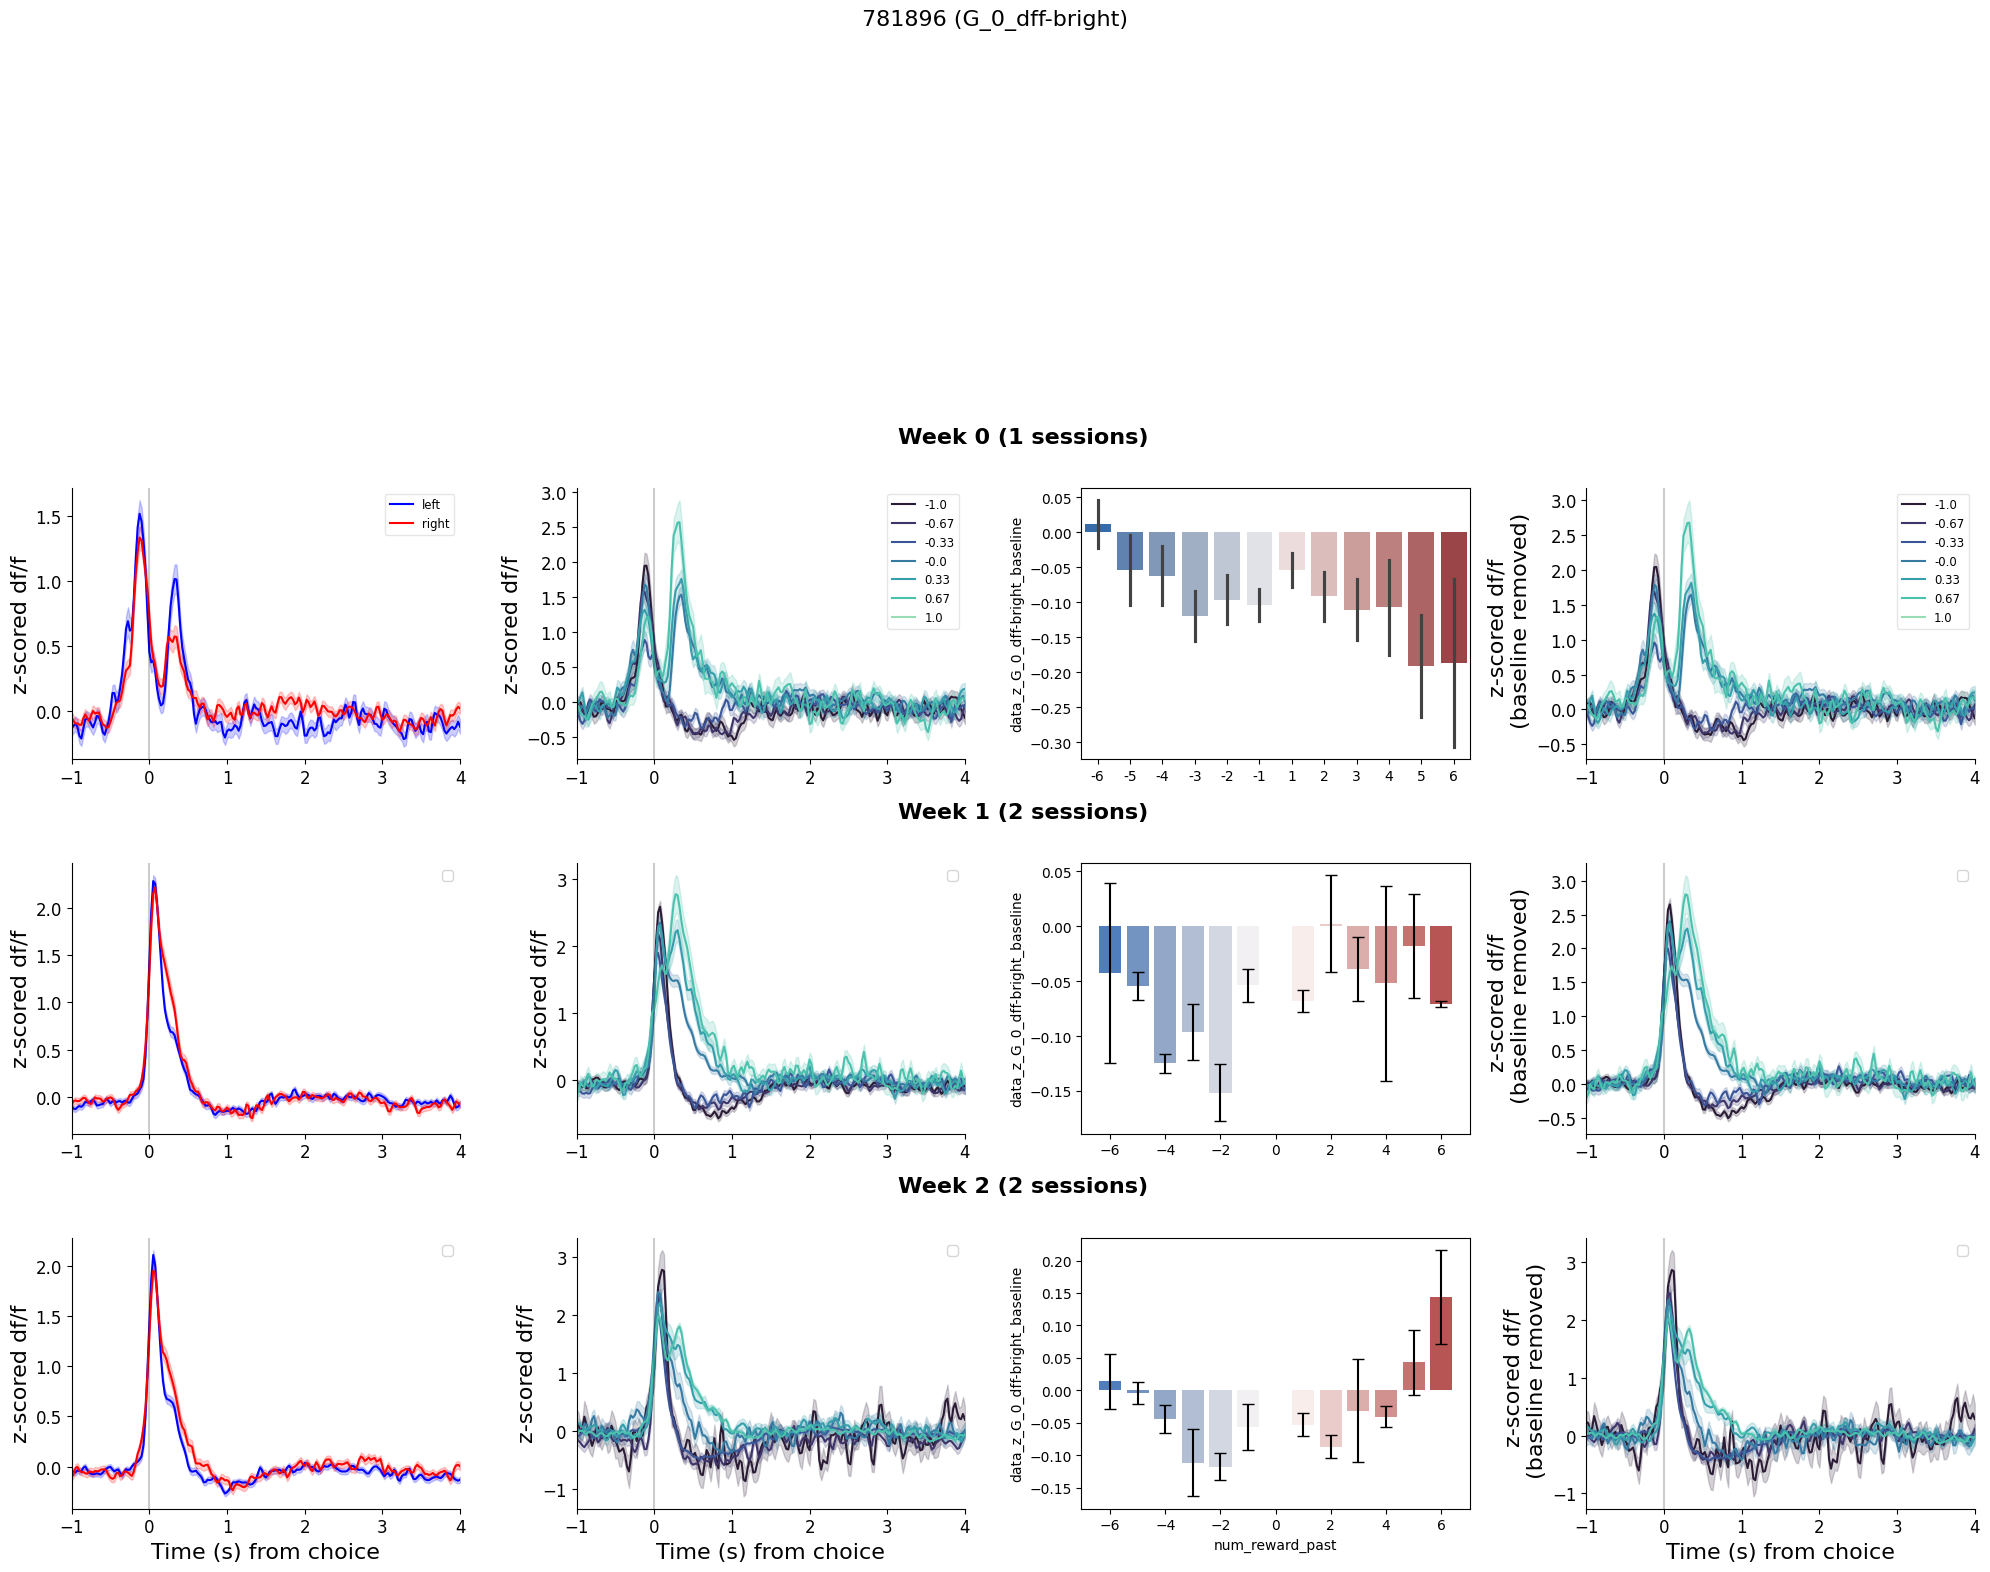

In [41]:
plot_weekly_grid(df_sess,nwbs_by_week,analysis_specification["channels"])

In [ ]:
# todo: add RPE info to the RPE legend-- it should be listed. 
# have alex review the errors (or just use the branch) 
# test it on 981896 examples 
# add the plots for slope of all RPE for the first row. 